#  <font color='red'> Perceptron classifier for MNIST data </font> 

Modify this code to classify 0 and 1 digits


## You need to install mlxtend using the command 

<font color=red> conda install mlxtend --channel conda-forge </font>

In [2]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
import platform
import numpy as np

plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12, 6]


## Load the MNIST data

In [5]:
if not platform.system() == 'Windows':
    X, y = loadlocal_mnist(
            images_path='train-images-idx3-ubyte', 
            labels_path='train-labels-idx1-ubyte')

else:
    X, y = loadlocal_mnist(
            images_path='train-images-idx3-ubyte', 
            labels_path='train-labels-idx1-ubyte')

Nfeatures = np.size(X,1)

## Extracting and displaying example digits

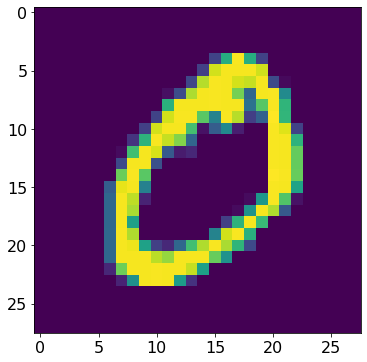

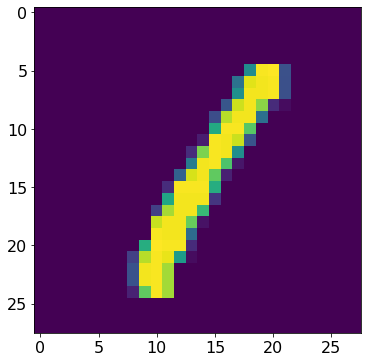

In [6]:
label0 = np.argwhere(y==0)[:,0]
label1 = np.argwhere(y==1)[:,0]

class1count = np.size(label0)
class2count = np.size(label1)

x1 = X[label0,:]
x2 = X[label1,:]

exampleImageClass1 = np.reshape(x1[0,:],(28,28))
s = plt.figure()
s = plt.imshow(exampleImageClass1)

exampleImageClass2 = np.reshape(x2[0,:],(28,28))
s = plt.figure()
s = plt.imshow(exampleImageClass2)

In [16]:
x1ones = np.asmatrix(np.ones((class1count,1)))
x1tilde = np.concatenate((x1, x1ones),axis=1)

x2ones = np.asmatrix(np.ones((class2count,1)))
x2tilde = np.concatenate((x2, x2ones),axis=1)

Z = np.concatenate((x1tilde,-x2tilde),axis=0)
Z = Z.T

a = np.asmatrix(np.random.randn(785,1))

labels = np.squeeze(np.matmul(np.transpose(a),Z))
wrongindices = np.argwhere(labels<0)[:,1]
nwrong = np.sum(labels<0)
print('Number of wrongly classified points=',nwrong)


Number of wrongly classified points= 4630


Number of wrongly classified points at iteration  0 is 4630
Number of wrongly classified points at iteration  30 is 34
Number of wrongly classified points at iteration  60 is 33
Number of wrongly classified points at iteration  90 is 27
Number of wrongly classified points at iteration  120 is 24
Number of wrongly classified points at iteration  150 is 21
Number of wrongly classified points at iteration  180 is 19
Number of wrongly classified points at iteration  210 is 19
Number of wrongly classified points at iteration  240 is 17
Number of wrongly classified points at iteration  270 is 16
Number of wrongly classified points at iteration  300 is 16
Number of wrongly classified points at iteration  330 is 16
Number of wrongly classified points at iteration  360 is 16
Number of wrongly classified points at iteration  390 is 16
Number of wrongly classified points at iteration  420 is 15
Number of wrongly classified points at iteration  450 is 12
Number of wrongly classified points at iter

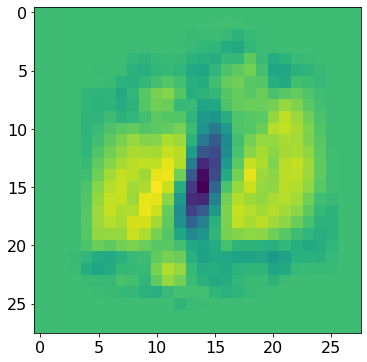

In [17]:
eta = 1e-2
for i in range(500):
    labels = np.squeeze(np.matmul(np.transpose(a),Z))
    wrongindices = np.argwhere(labels<0)[:,1]
    Gradient = -np.sum(Z[:,wrongindices],axis=1)
    a = a - eta*Gradient
    nwrong = np.sum(labels<0)
    if(np.squeeze(np.mod(i,30))==0):
        print('Number of wrongly classified points at iteration ',i,'is',nwrong)


labels = np.squeeze(np.matmul(np.transpose(a),Z))
wrongindices = np.argwhere(labels<0)[:,1]
nwrong = np.sum(labels<0)
print('Number of final number of misclassified points=',nwrong)
plt.imshow(np.reshape(a[0:784],(28,28)))